# Table of Contents
 <p><div class="lev1"><a href="#Our-plan"><span class="toc-item-num">1&nbsp;&nbsp;</span>Our plan</a></div><div class="lev1"><a href="#Data-wrangling"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data wrangling</a></div><div class="lev1"><a href="#Exploring-population"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploring <em>population</em></a></div><div class="lev2"><a href="#Cross-section"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cross-section</a></div><div class="lev3"><a href="#Location-and-spread-of-the-data"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Location and spread of the data</a></div><div class="lev3"><a href="#Shape-of-the-data"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Shape of the data</a></div><div class="lev3"><a href="#Skewness-and-kurtosis"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span><a href="http://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm" target="_blank">Skewness and kurtosis</a></a></div><div class="lev3"><a href="#The-trusty-histogram"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>The trusty histogram</a></div><div class="lev3"><a href="#Log-transform"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Log transform</a></div><div class="lev3"><a href="#Normalization"><span class="toc-item-num">3.1.6&nbsp;&nbsp;</span>Normalization</a></div><div class="lev2"><a href="#Over-time"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Over time</a></div><div class="lev3"><a href="#One-country"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>One country</a></div><div class="lev3"><a href="#One-region"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>One region</a></div><div class="lev2"><a href="#Geospatial-over-time-(Interactive-widgets)"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Geospatial over time (Interactive widgets)</a></div><div class="lev2"><a href="#Note-on-exploratory-geospatial-data-analysis"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Note on exploratory geospatial data analysis</a></div><div class="lev2"><a href="#To-do:-Record-questions-that-came-up-during-the-exploration"><span class="toc-item-num">3.5&nbsp;&nbsp;</span><strong>To do</strong>: Record questions that came up during the exploration</a></div><div class="lev1"><a href="#To-do:-Perform-univariate-analysis-on-an-additional-variable."><span class="toc-item-num">4&nbsp;&nbsp;</span><strong>To do</strong>: Perform univariate analysis on an additional variable.</a></div><div class="lev1"><a href="#Extras"><span class="toc-item-num">5&nbsp;&nbsp;</span>Extras</a></div><div class="lev2"><a href="#Exploring-total-renewable-water-resources"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Exploring <em>total renewable water resources</em></a></div><div class="lev2"><a href="#Assessing-many-variables"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Assessing many variables</a></div>

In [1]:
# must go first 
%matplotlib inline 
%config InlineBackend.figure_format='retina'

# plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context("poster", font_scale=1.3)
import folium

# system packages 
import os, sys
import warnings
warnings.filterwarnings('ignore')

# basic wrangling 
import numpy as np
import pandas as pd

# eda tools 
import pivottablejs
import missingno as msno
import pandas_profiling

# interactive 
import ipywidgets as widgets

# more technical eda
import sklearn
import scipy

In [2]:
sys.path.append('../../scripts/')

In [3]:
from aqua_helper import time_slice, country_slice, time_series, simple_regions, subregion, variable_slice

In [4]:
mpl_update = {'font.size':16,
              'xtick.labelsize':14,
              'ytick.labelsize':14,
              'figure.figsize':[12.0,8.0],
              'axes.color_cycle':['#0055A7', '#2C3E4F', '#26C5ED', '#00cc66', '#D34100', '#FF9700','#091D32'], 
              'axes.labelsize':16,
              'axes.labelcolor':'#677385',
              'axes.titlesize':20,
              'lines.color':'#0055A7',
              'lines.linewidth':3,
              'text.color':'#677385'}
mpl.rcParams.update(mpl_update)

# Our plan

<img src="figures/branches.jpg" alt="Crisp-DM" width="390" align="right">
Exploratory data analysis consists of the following major tasks, which we present linearly here because each task doesn't make much sense to do without the ones prior to it. However, in reality, you are going to constantly jump around from step to step.  You may want to do all the steps for a subset of the variables first. Or often, an observation will bring up a question you want to investigate and you'll branch off and explore to answer that question before returning down the main path of exhaustive EDA.

1. Form hypotheses/develop investigation themes to explore 
3. Wrangle data 
3. Assess quality of data 
4. Profile data
5. **Explore each individual variable in the dataset** 
6. Assess the relationship between each variable and the target 
7. Assess interactions between variables 
8. Explore data across many dimensions 

Throughout the entire analysis you want to:
* Capture a list of hypotheses and questions that come up for further exploration.
* Record things to watch out for/ be aware of in future analyses. 
* Show intermediate results to colleagues to get a fresh perspective, feedback, domain knowledge. Don't do EDA in a bubble! Get feedback throughout especially from people removed from the problem and/or with relevant domain knowledge. 
* Position visuals and results together. EDA relies on your natural pattern recognition abilities so maximize what you'll find by putting visualizations and results in close proximity. 


# Data wrangling 

http://www.fao.org/nr/water/aquastat/data/query/index.html

In [5]:
data = pd.read_csv('../../data/aquastat/aquastat.csv.gzip', compression='gzip')

# simplify regions
data.region = data.region.apply(lambda x: simple_regions[x])

# remove exploitable fields and national rainfall index
data = data.loc[~data.variable.str.contains('exploitable'),:]
data = data.loc[~(data.variable=='national_rainfall_index')]

Overview of variables

In [6]:
data[['variable','variable_full']].drop_duplicates()

,variable,variable_full
0,total_area,Total area of the country (1000 ha)
576,arable_land,Arable land area (1000 ha)
1152,permanent_crop_area,Permanent crops area (1000 ha)
1728,cultivated_area,Cultivated area (arable land + permanent crops...
2304,percent_cultivated,% of total country area cultivated (%)
2880,total_pop,Total population (1000 inhab)
3456,rural_pop,Rural population (1000 inhab)
4032,urban_pop,Urban population (1000 inhab)
4608,gdp,Gross Domestic Product (GDP) (current US$)
5184,gdp_per_capita,GDP per capita (current US$/inhab)


Subset for cross-sectional analysis

In [7]:
recent = time_slice(data, '2013-2017')

# Exploring *population*

## Cross-section
For numerical data, look at: 

* *Location*: mean, median, mode, interquartile mean 
* *Spread*: standard deviation, variance, range, interquartile range
* *Shape*: skewness, kurtosis 

### Location and spread of the data

Are minimum/maximum values feasible? 

In [8]:
recent[['total_pop', 'urban_pop', 'rural_pop']].describe().astype(int)

2013-2017,total_pop,urban_pop,rural_pop
count,199,199,199
mean,36890,19849,17040
std,140720,69681,77461
min,0,0,-98
25%,1368,822,500
50%,7595,3967,2404
75%,25088,11656,10677
max,1407306,805387,891112


Rural population is negative... what does that mean? 

In [9]:
recent.sort_values('rural_pop')[['total_pop','urban_pop','rural_pop']].head()

2013-2017,total_pop,urban_pop,rural_pop
country,,,
Qatar,2235.00,2333.00,-98.00
Singapore,5604.00,5619.00,-15.00
Monaco,37.73,38.32,-0.59
Holy See,0.80,0.80,0.00
Nauru,10.22,10.12,0.10


Visit glossary for dataset: http://www.fao.org/nr/water/aquastat/data/glossary/search.html?termId=4105&submitBtn=s&cls=yes

`Rural population = Total population - urban population`

In [10]:
time_series(data, 'Qatar', 'total_pop').join(time_series(data, 'Qatar', 'urban_pop')).join(time_series(data, 'Qatar', 'rural_pop'))

,total_pop,urban_pop,rural_pop
year_measured,,,
1962,56.19,48.39,7.80
1967,86.16,75.48,10.68
1972,130.40,115.60,14.80
1977,182.40,162.40,20.00
1982,277.20,248.60,28.60
1987,423.30,385.40,37.90
1992,489.70,459.10,30.60
1997,528.20,506.50,21.70
2002,634.40,608.90,25.50


What to do about non-physical numbers? Remove? Replace with estimates from other sources like the world bank? 
--> Need to have a clear thought out reason for what you decide to do

We should also start suspecting that the data is skewed:
* 50% quartile much closer to 25% or 75% in value
* Large difference between mean and 50% 

### Shape of the data
* Is the distribution skewed? Bimodal? 
* Are there outliers? Are they feasible? 
* Are there discontinuities? 

In [11]:
recent[['total_pop', 'urban_pop', 'rural_pop']].describe().astype(int)

2013-2017,total_pop,urban_pop,rural_pop
count,199,199,199
mean,36890,19849,17040
std,140720,69681,77461
min,0,0,-98
25%,1368,822,500
50%,7595,3967,2404
75%,25088,11656,10677
max,1407306,805387,891112


Yes, it looks like population is skewed. Let's try calculting skewness and kurtosis and plot a histogram to visualize.

### [Skewness and kurtosis](http://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm)

*Skewness:* measure of lack of symmetry. 

*Kurtosis:* measure of whether the data are heavily tailed relative to the normal distribution. 

In [14]:
recent[['total_pop', 'urban_pop', 'rural_pop']].skew()

2013-2017
total_pop    8.584220
urban_pop    8.610731
rural_pop    9.562258
dtype: float64

Skewness for normal distribution should be zero. Negative skewness indicates skew left and positive skewness indicates skew right. 

In [15]:
recent[['total_pop', 'urban_pop', 'rural_pop']].kurtosis()

2013-2017
total_pop    78.922809
urban_pop    87.718184
rural_pop    98.322015
dtype: float64

Kurtosis is also zero for a normal distribution and can only be postiive. We definitely have some outliers! 

### The trusty histogram

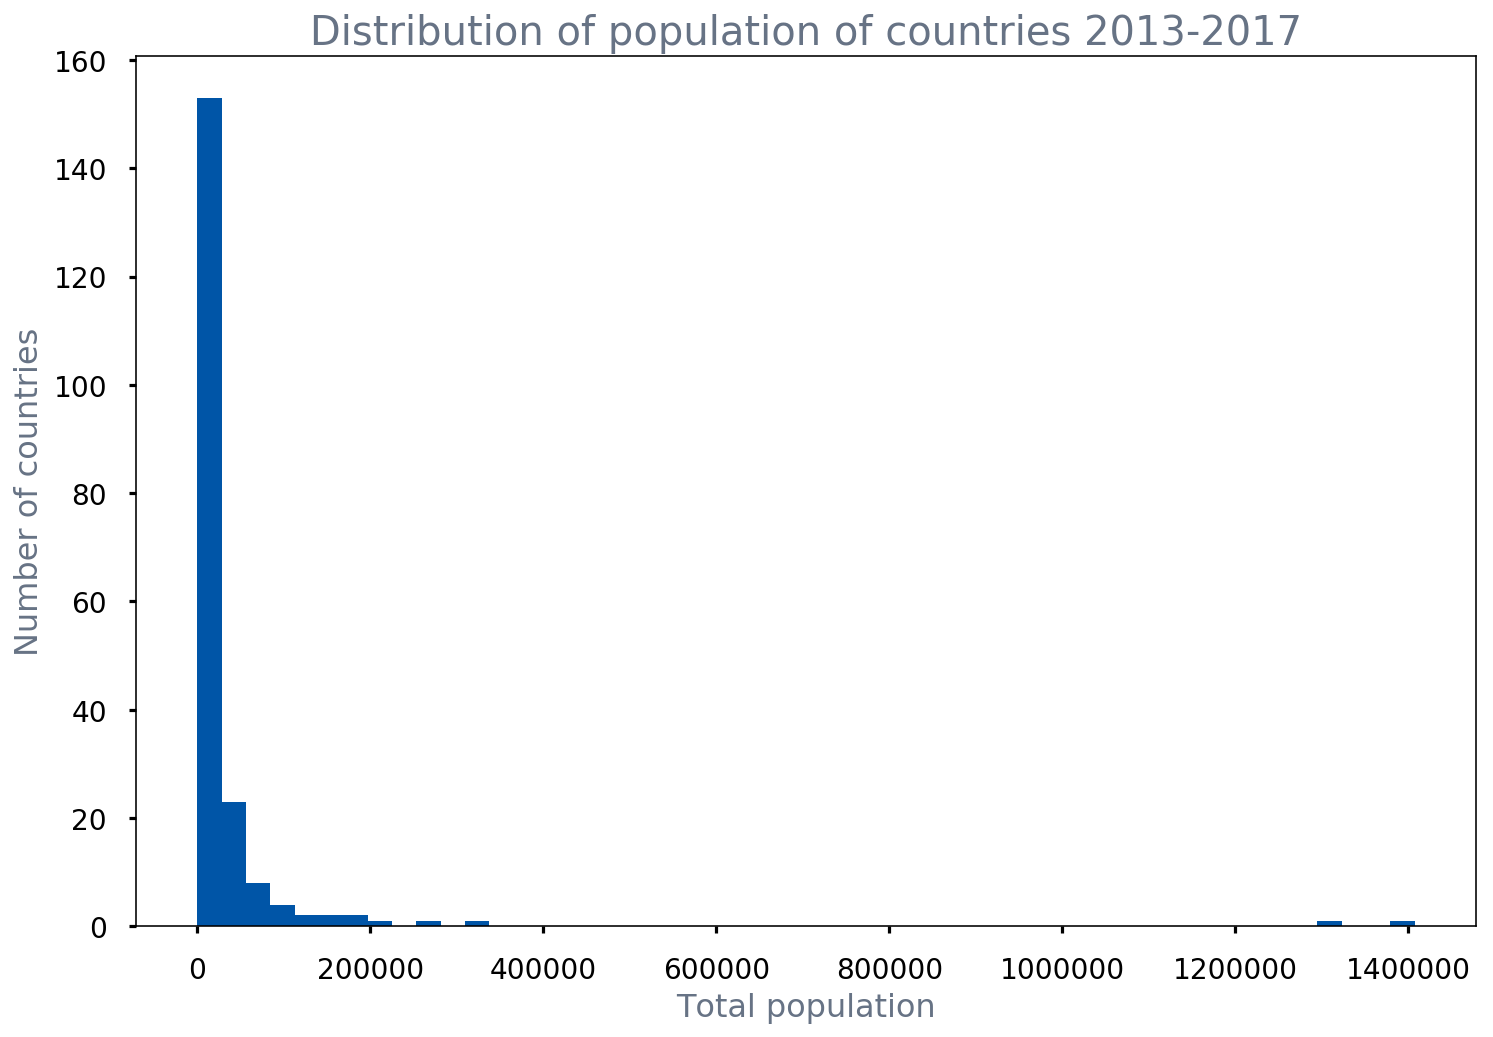

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(recent.total_pop.values, bins=50);
ax.set_xlabel('Total population');
ax.set_ylabel('Number of countries');
ax.set_title('Distribution of population of countries 2013-2017');

Let's functionalize this so we can use it again.

Yup, definitely skewed. Why is this a problem?
* Many models assume a normal (bell-like) curve
* It is difficult to differentiate observations when skewed (~150/199 look all the same!) 

Let's look at a map:

In [19]:
# Extending the code we used for plotting nulls geospatially
def plot_map(df, variable, time_period=None, log=False, 
             legend_name=None, threshold_scale=None):
    geo = r'../../data/aquastat/world.json'
    
    legend_name = legend_name if legend_name else '%s for %s' % (variable, time_period)
    if time_period:
        df = time_slice(df, time_period).reset_index()
    else: 
        df = df.reset_index()
    
    if log:
        df[variable] = df[variable].apply(np.log)
        
    map = folium.Map(location=[34,-45], zoom_start=2,
                     width=1200, height=600)
    map.choropleth(geo_data=geo, 
                   data=df,
                   columns=['country', variable],
                   key_on='feature.properties.name', reset=True,
                   fill_color='PuBuGn', fill_opacity=0.7, line_opacity=0.2,
                   legend_name=legend_name,
                   threshold_scale=threshold_scale)
    return map

In [20]:
plot_map(data, 'total_pop', '2013-2017', legend_name='Total population')

What is the solution? Often, taking a log transform will make a variable more normal. 

### Log transform

Does taking the log reduce skewness? 

In [22]:
recent[['total_pop']].apply(np.log).skew()
# recent[['total_pop']].apply(np.log).apply(scipy.stats.skewtest)

2013-2017
total_pop   -0.905906
dtype: float64

It does reduce skewness but does not make it disappear. How about kurtosis? 

In [23]:
recent[['total_pop']].apply(np.log).apply(scipy.stats.kurtosis)
# recent[['total_pop']].apply(np.log).apply(scipy.stats.kurtosistest)

2013-2017
total_pop    1.086877
dtype: float64

Again, it reduces but does not get rid of kurtosis. 

Let's look visually at a histogram of the transformed distribution. 

First, let's functionalize the histogram code from earlier and add in the 

In [24]:
def plot_hist(df, variable, bins=20, xlabel=None, by=None,
              ylabel=None, title=None, logx=False, ax=None):

    if not ax:
        fig, ax = plt.subplots(figsize=(12,8))
    if logx:
        if df[variable].min() <=0:
            df[variable] = df[variable] - df[variable].min() + 1
            print('Warning: data <=0 exists, data transformed by %0.2g before plotting' % (- df[variable].min() + 1))
        
        bins = np.logspace(np.log10(df[variable].min()),
                           np.log10(df[variable].max()), bins)
        ax.set_xscale("log")

    ax.hist(df[variable].dropna().values, bins=bins);
    
    if xlabel:
        ax.set_xlabel(xlabel);
    if ylabel:
        ax.set_ylabel(ylabel);
    if title:
        ax.set_title(title);
    
    return ax

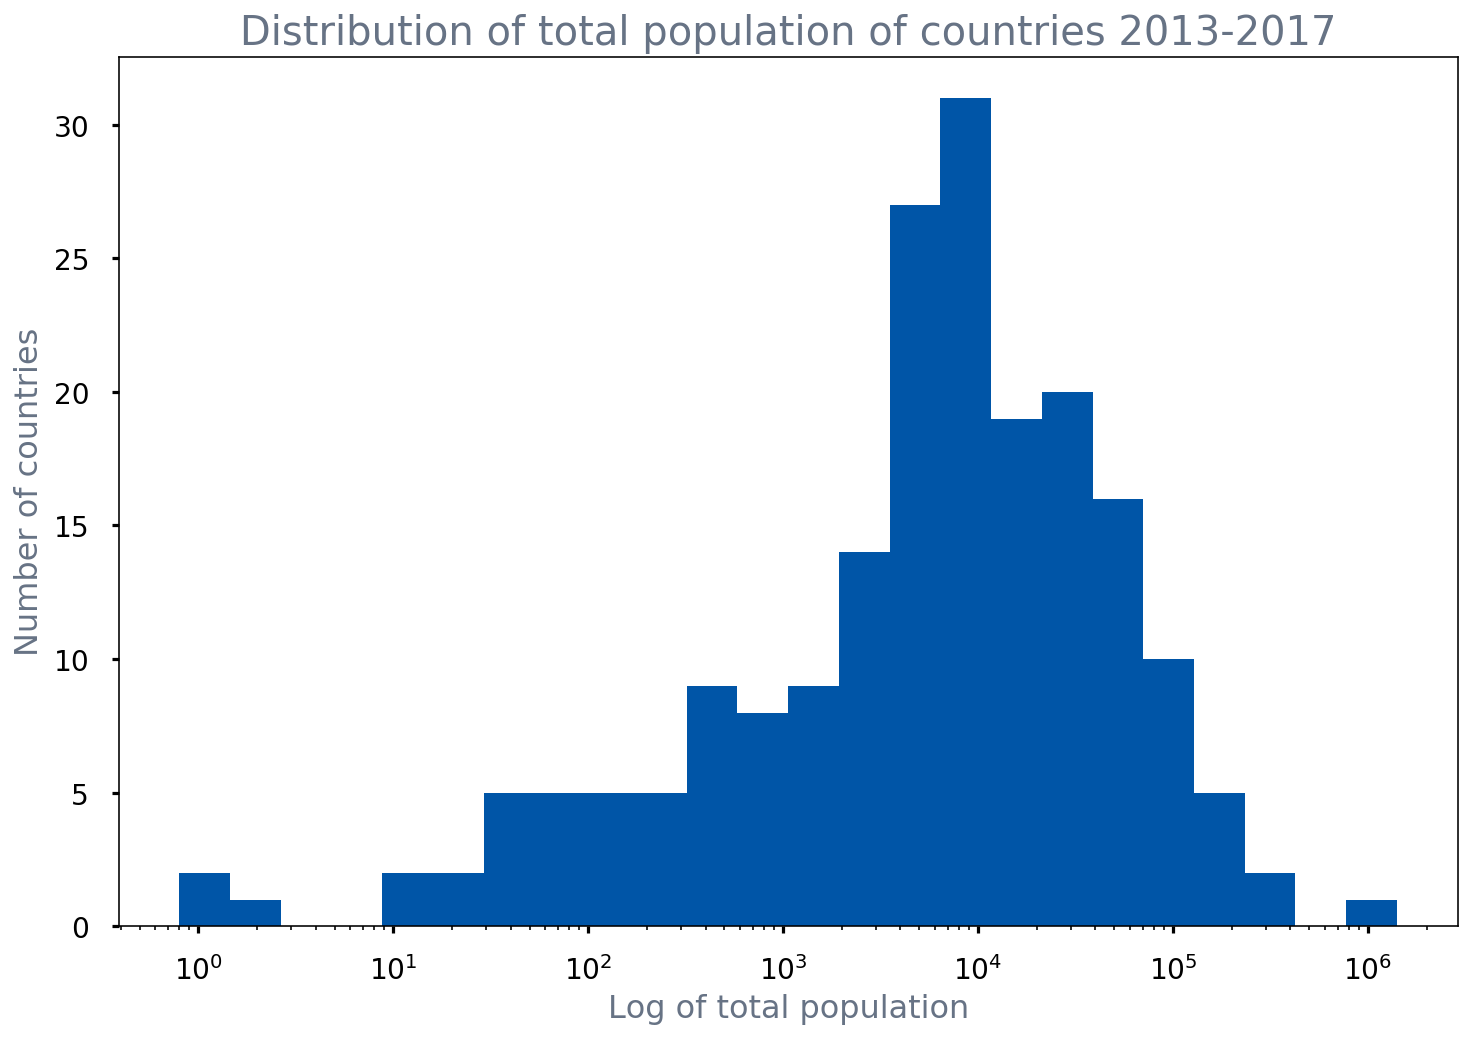

In [25]:
plot_hist(recent, 'total_pop', bins=25, logx=True, 
          xlabel='Log of total population', ylabel='Number of countries',
          title='Distribution of total population of countries 2013-2017');

In [26]:
plot_map(data, 'total_pop', '2013-2017', legend_name='Log of total population', log=True)

Now we can see more variation across countries.

We can see larger countries have larger populations - that makes sense... we may hypothesize that water availability may affect countries with higher population _density_ rather than higher absolute populations.  

*Normalization* is a critical tool in the data scientist's toolbox and is often used for engineering features.

### Normalization

In [27]:
recent['population_density'] = recent.total_pop.divide(recent.total_area)

In [28]:
plot_map(recent, 'population_density', legend_name='Population density', 
         threshold_scale=[0,0.3,0.8, 1.8, 78])

## Over time

### One country

Check a sample we have familiarity with. 
* Are the units what we think they are? 
* Does this behavior correspond with our pre-existing knowledge? 

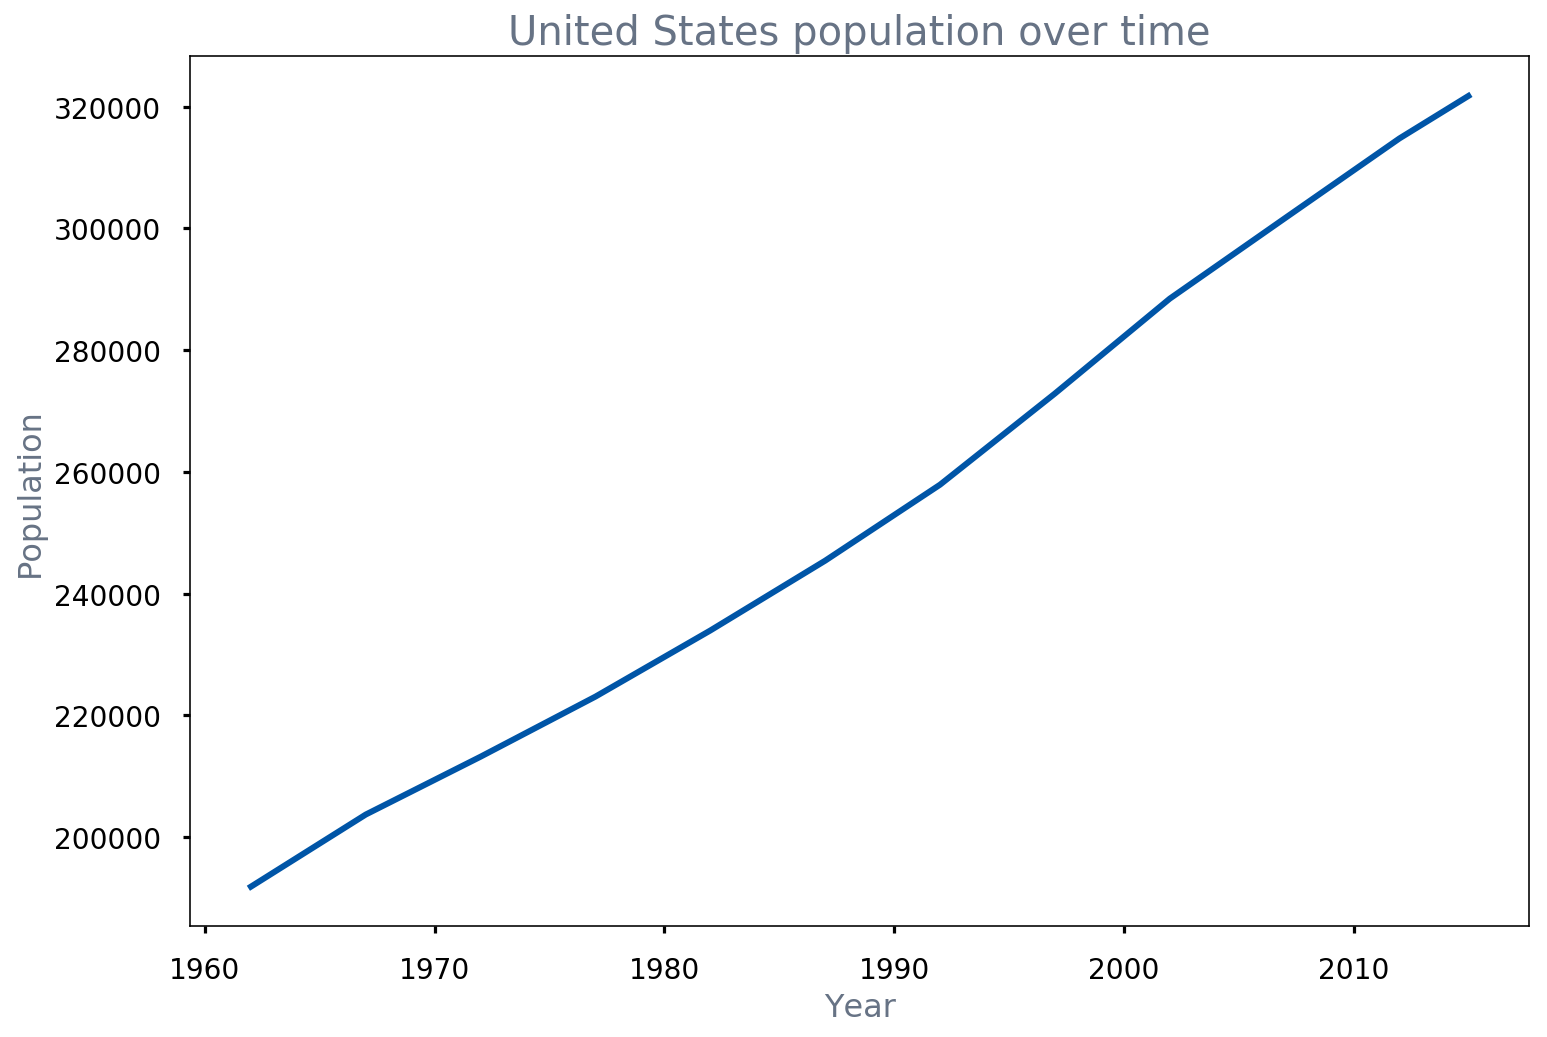

In [29]:
plt.plot(time_series(data, 'United States of America', 'total_pop'));
plt.xlabel('Year');
plt.ylabel('Population');
plt.title('United States population over time');


### One region 

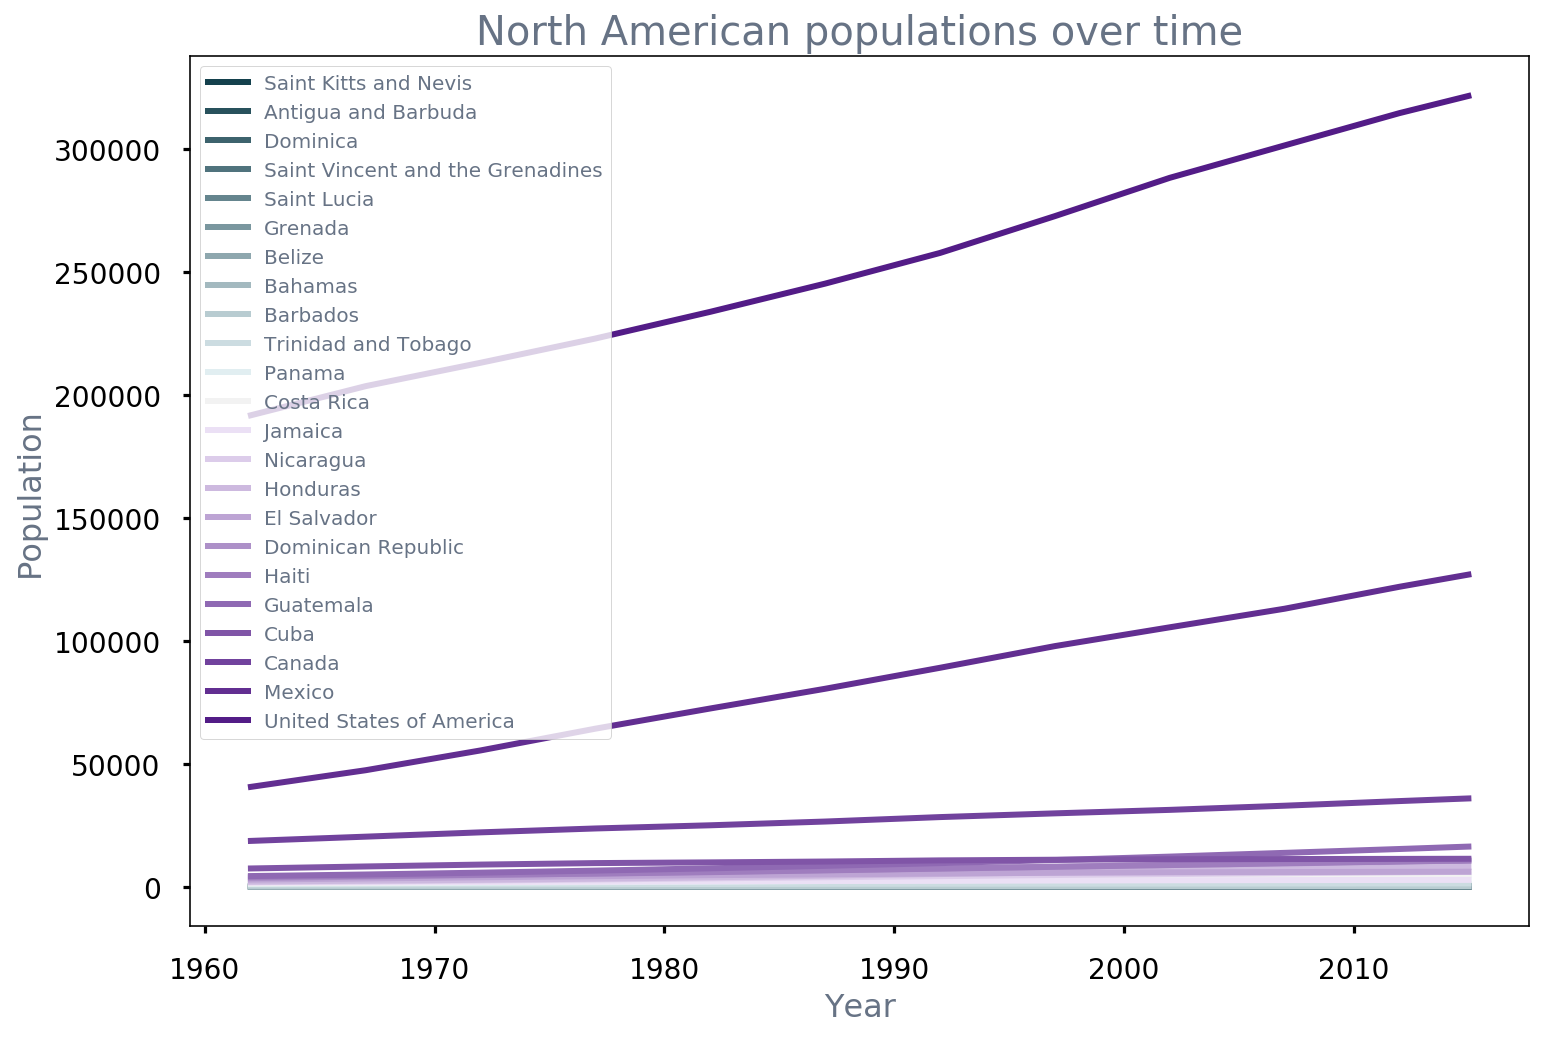

In [30]:
with sns.color_palette(sns.diverging_palette(220, 280, s=85, l=25, n=23)):
    north_america = time_slice(subregion(data, 'North America'), '1958-1962').sort_values('total_pop').index.tolist()
    for country in north_america:
        plt.plot(time_series(data, country, 'total_pop'), label=country);
        plt.xlabel('Year');
        plt.ylabel('Population');
        plt.title('North American populations over time');
    plt.legend(loc=2,prop={'size':10});


This doesn't really tell us anything except North America is the biggest country. We'd like to understand how each country's population changes over time, mostly in reference to itself. Let's normalize again. 

What should we normalize by? We could chose a country's minimum, mean, median, maximum... or any other location.

Let's choose minimum so we can see how much each country grows in reference to its starting population. 

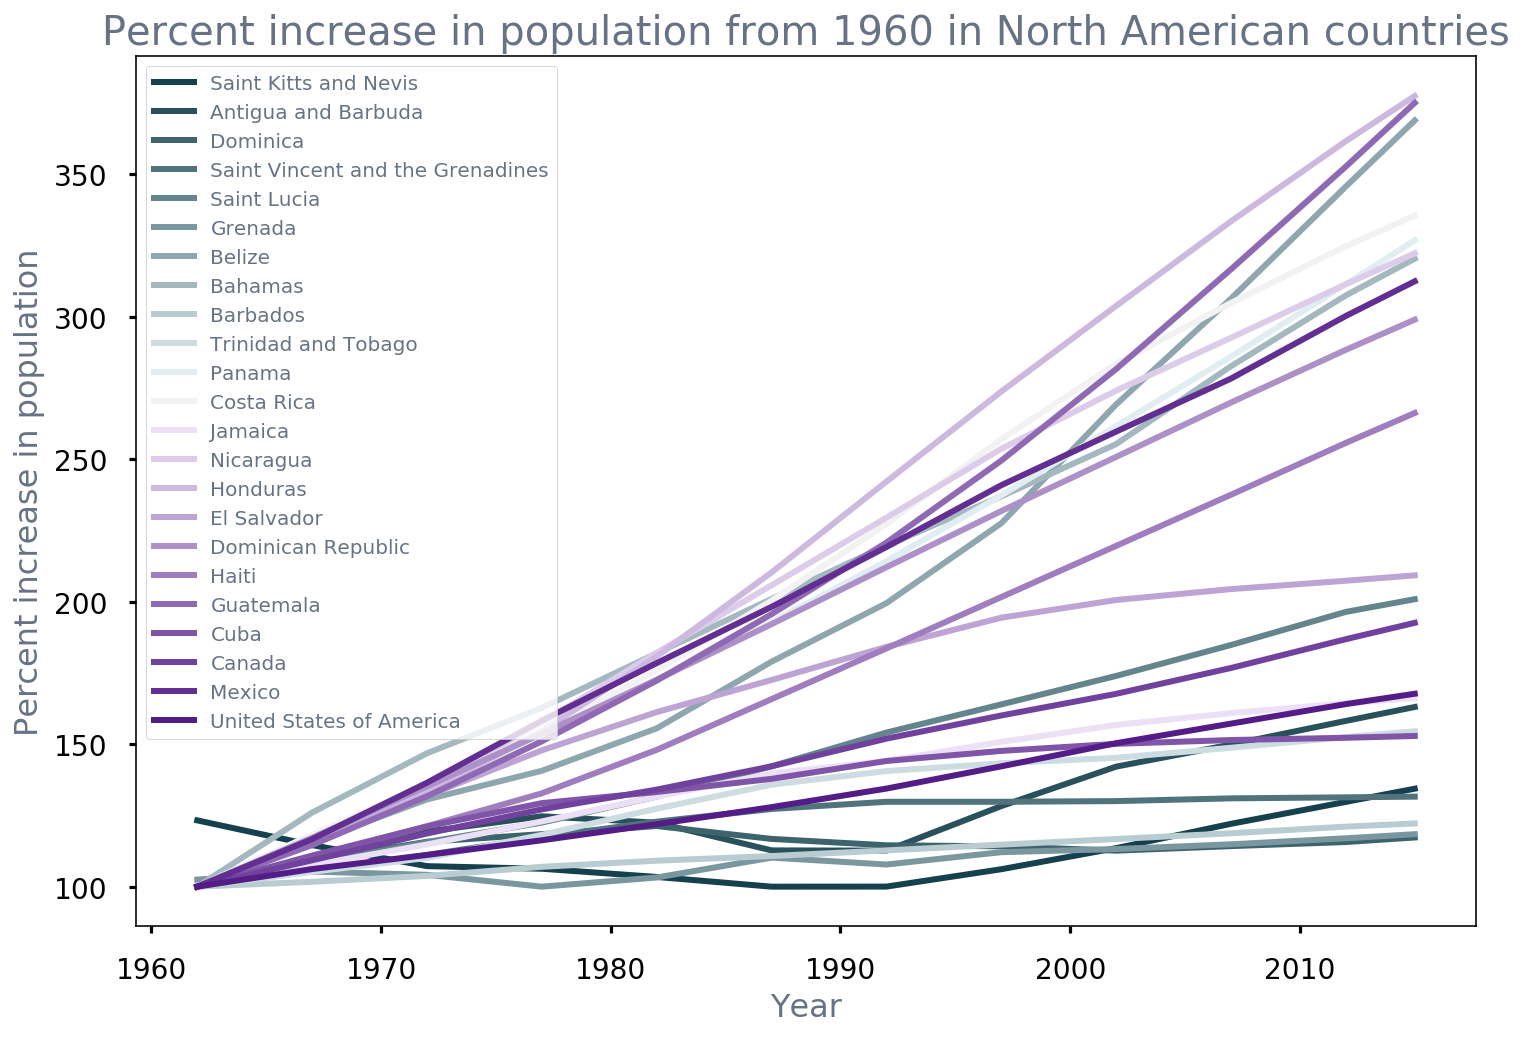

In [31]:
with sns.color_palette(sns.diverging_palette(220, 280, s=85, l=25, n=23)):
    for country in north_america:
        ts = time_series(data, country, 'total_pop')
        ts['norm_pop'] = ts.total_pop/ts.total_pop.min()*100
        plt.plot(ts['norm_pop'], label=country);
        plt.xlabel('Year');
        plt.ylabel('Percent increase in population');
        plt.title('Percent increase in population from 1960 in North American countries');
    plt.legend(loc=2,prop={'size':10});


There are too many lines here!  We should really only have 3-4 lines on a plot to be able to spot patterns. What we can see, however, is that *generally*, larger countries grow faster thatn smaller, with two main exceptions. But, we can't figure out which countries those are. Another option is a heatmap. 

In [32]:
north_america_pop = variable_slice(subregion(data, 'North America'), 'total_pop')
north_america_norm_pop = north_america_pop.div(north_america_pop.min(axis=1), axis=0)*100
north_america_norm_pop = north_america_norm_pop.loc[north_america]

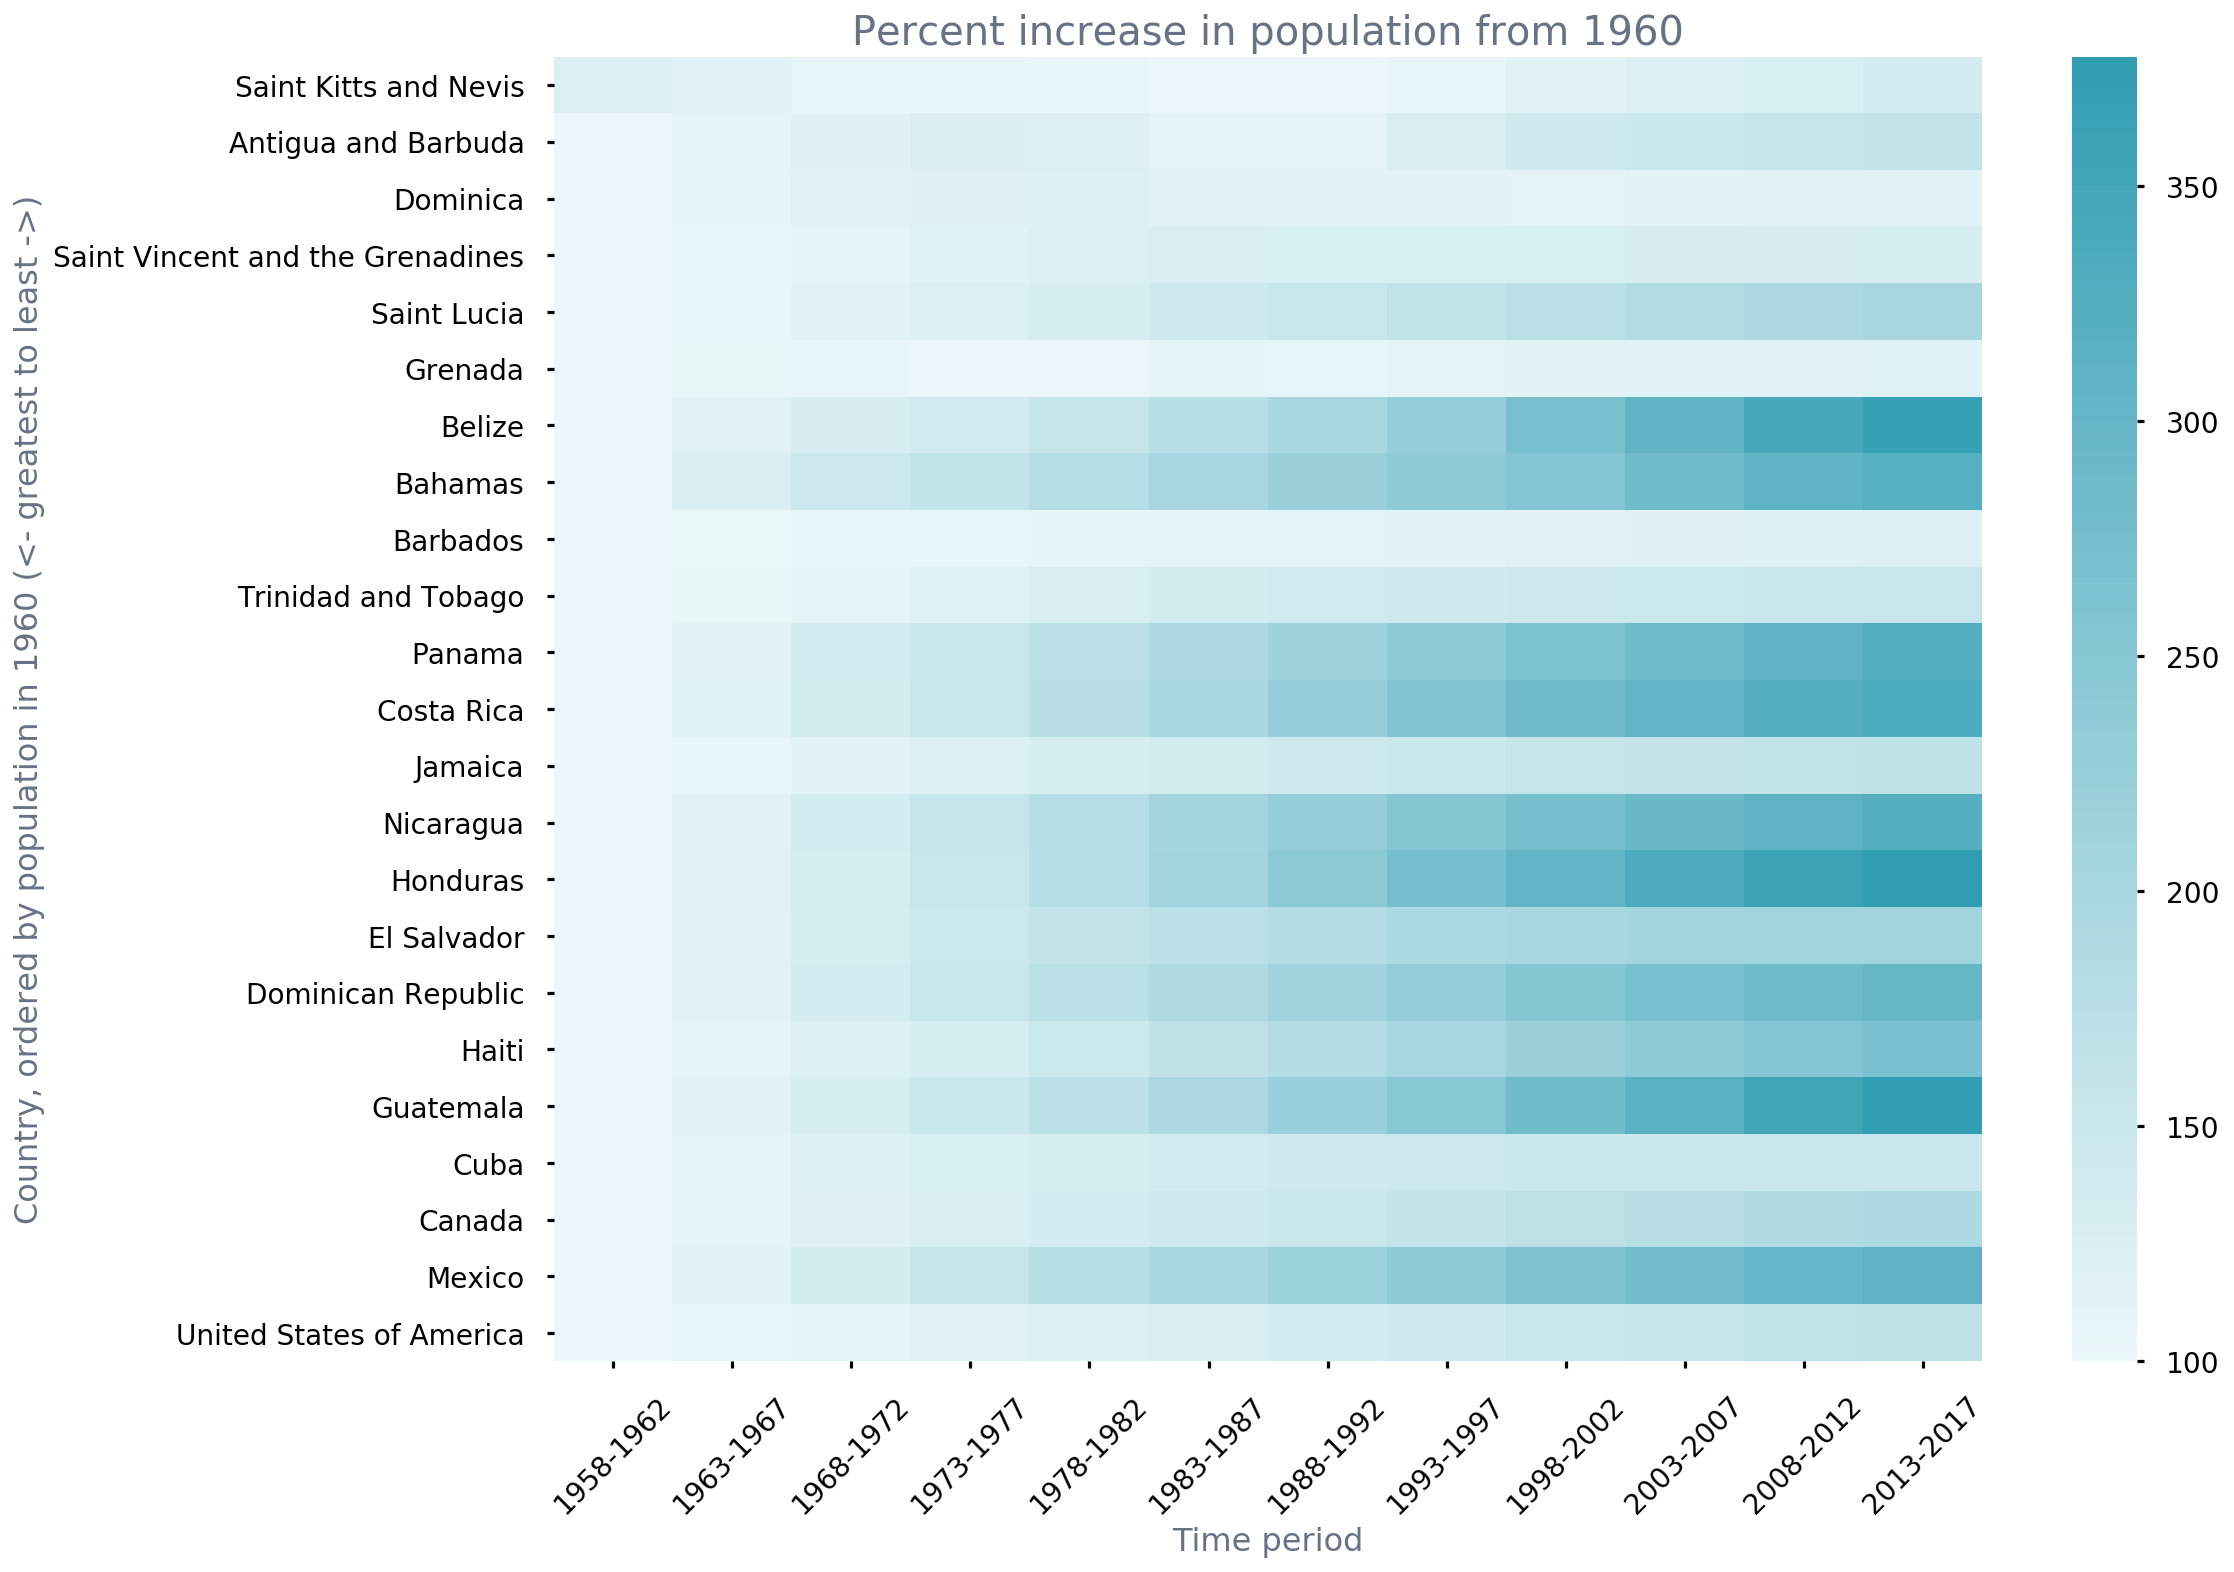

In [33]:
fig, ax = plt.subplots(figsize=(16, 12));
sns.heatmap(north_america_norm_pop, ax=ax, cmap=sns.light_palette((214, 90, 60), input="husl", as_cmap=True));
plt.xticks(rotation=45);
plt.xlabel('Time period');
plt.ylabel('Country, ordered by population in 1960 (<- greatest to least ->)');
plt.title('Percent increase in population from 1960');


## Geospatial over time (Interactive widgets) 

[`ipywidgets`](https://github.com/jupyter-widgets/ipywidgets) allow for you to change variables passed through to a function through some kind of widget, such as a selection slider (below), a drop down menu, or more. 

To use `ipywidgets` you must: 
1. Have already run this from the command line: 
 `jupyter nbextension enable --py --sys-prefix widgetsnbextension`
2. Define your widget including the possible value options and which value to initialize the widget at. 
3. Define the function that you want to make interactive. 
4. Initialize the interaction through `widgets.interact`.

We perform all these steps within a function so we can reuse it for different variables:

In [34]:
def map_over_time(df, variable, time_periods, log=False, 
                  threshold_scale=None, legend_name=None):
    
    time_slider = widgets.SelectionSlider(options=time_periods.tolist(),
                                      value=time_periods[0],
                                      description='Time period:',
                                      disabled=False,
                                      button_style='')
    widgets.interact(plot_map, df=widgets.fixed(df), 
                     variable=widgets.fixed(variable),
                     time_period=time_slider, log=widgets.fixed(log), 
                     legend_name=widgets.fixed(legend_name), 
                     threshold_scale=widgets.fixed(threshold_scale));

In [35]:
time_periods = data.time_period.unique()

In [36]:
map_over_time(data, 'total_pop', time_periods, log=True)

interactive(children=(SelectionSlider(description='Time period:', options=('1958-1962', '1963-1967', '1968-1972', '1973-1977', '1978-1982', '1983-1987', '1988-1992', '1993-1997', '1998-2002', '2003-2007', '2008-2012', '2013-2017'), value='1958-1962'), Output()), _dom_classes=('widget-interact',))

## Note on exploratory geospatial data analysis

Please note, geospatial data analysis is a whole field of its own and we don't begin to do it justice here. There are many technical assumptions for geospatial modeling that we have not looked at as well as number of numerical methods for exploring it. The PySal package is a good package to start with in the field and tutorial can be found [here](http://darribas.org/gds_scipy16/) for introductory geospatial data analysis. 

## **To do**: Record questions that came up during the exploration

# **To do**: Perform univariate analysis on an additional variable.

# Extras

## Exploring *total renewable water resources*

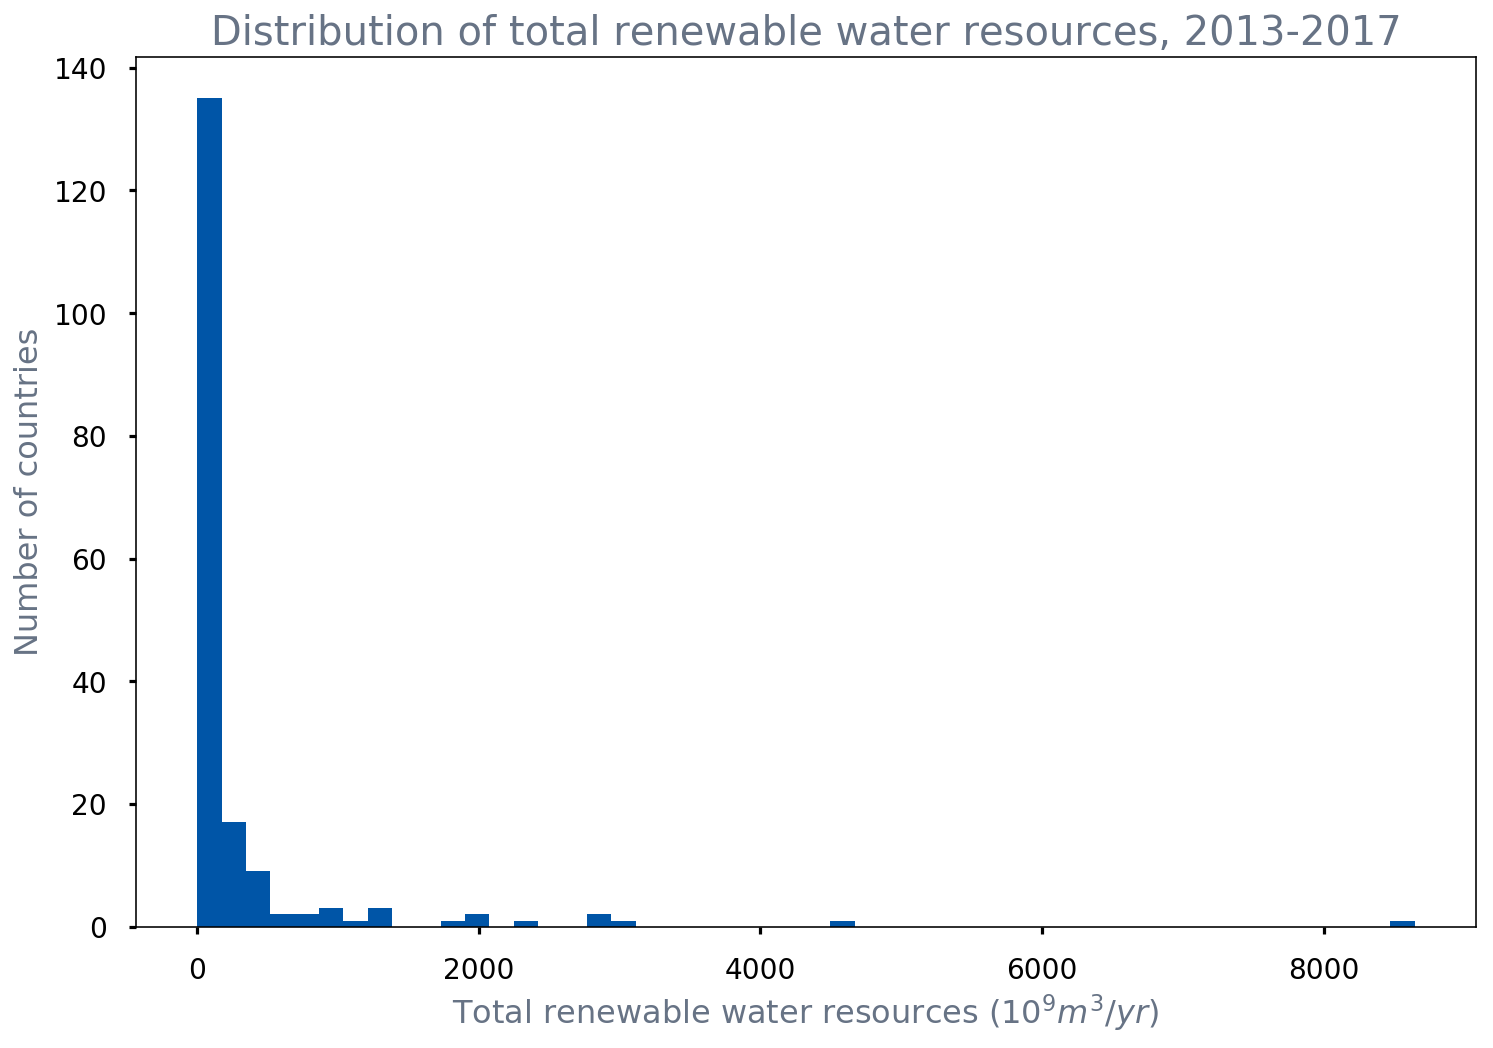

In [37]:
plot_hist(recent, 'total_renewable', bins=50, 
          xlabel='Total renewable water resources ($10^9 m^3/yr$)',
          ylabel='Number of countries', 
          title='Distribution of total renewable water resources, 2013-2017');

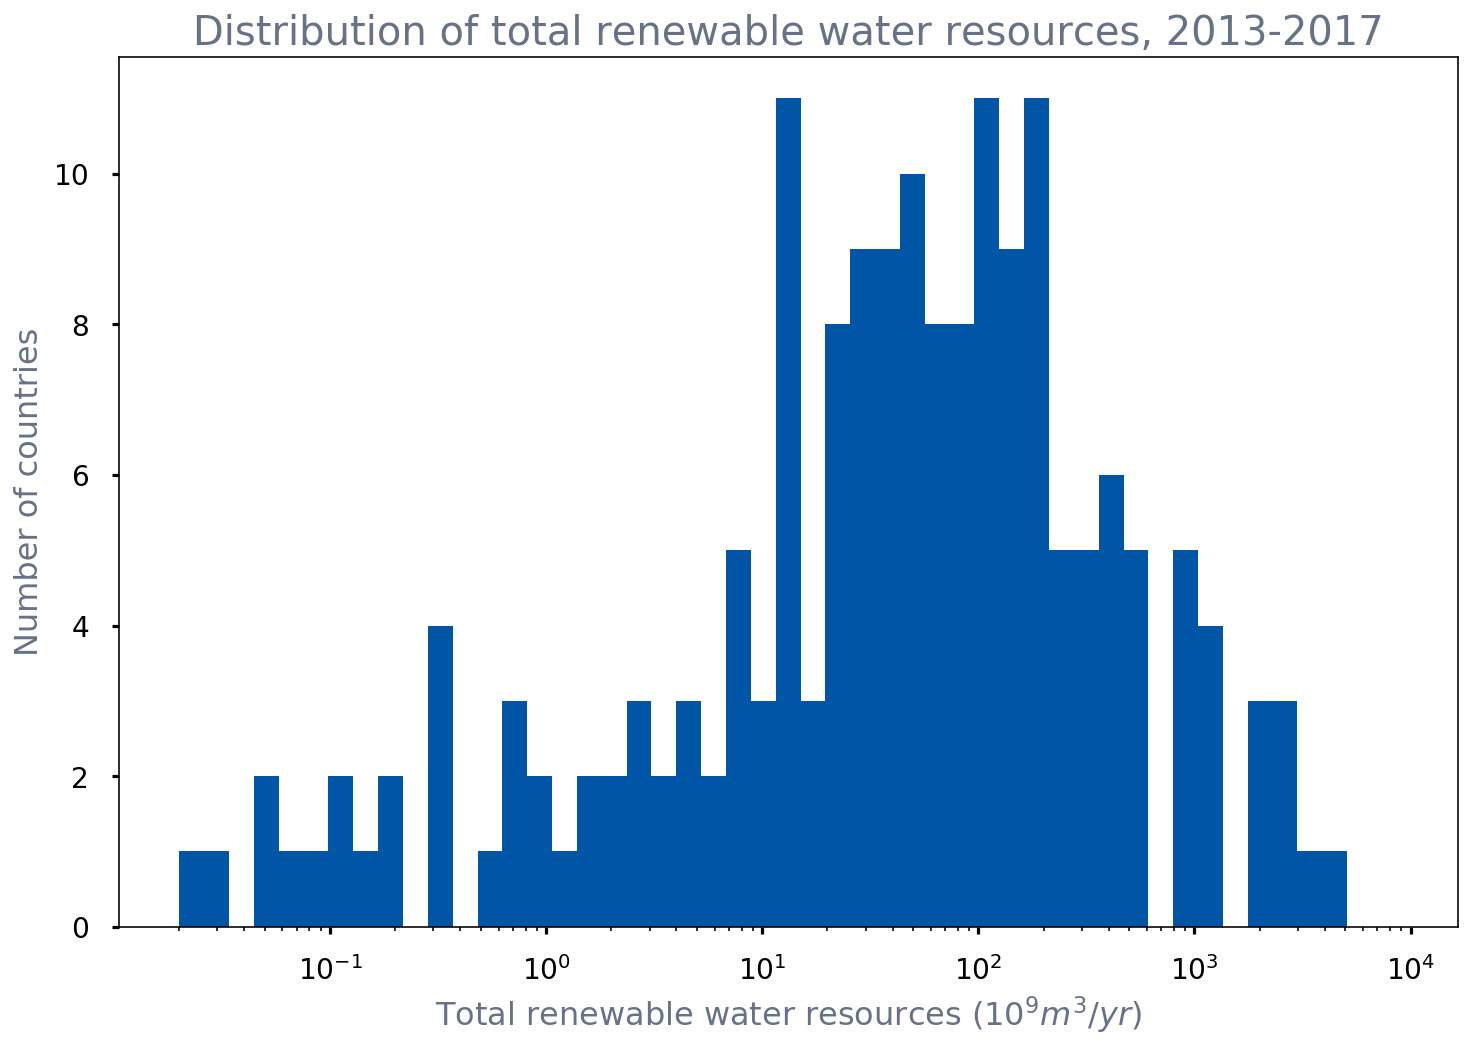

In [38]:
plot_hist(recent, 'total_renewable', bins=50, 
          xlabel='Total renewable water resources ($10^9 m^3/yr$)',
          ylabel='Number of countries', logx=True,
          title='Distribution of total renewable water resources, 2013-2017');

In [39]:
north_america_renew = variable_slice(subregion(data, 'North America'), 'total_renewable')

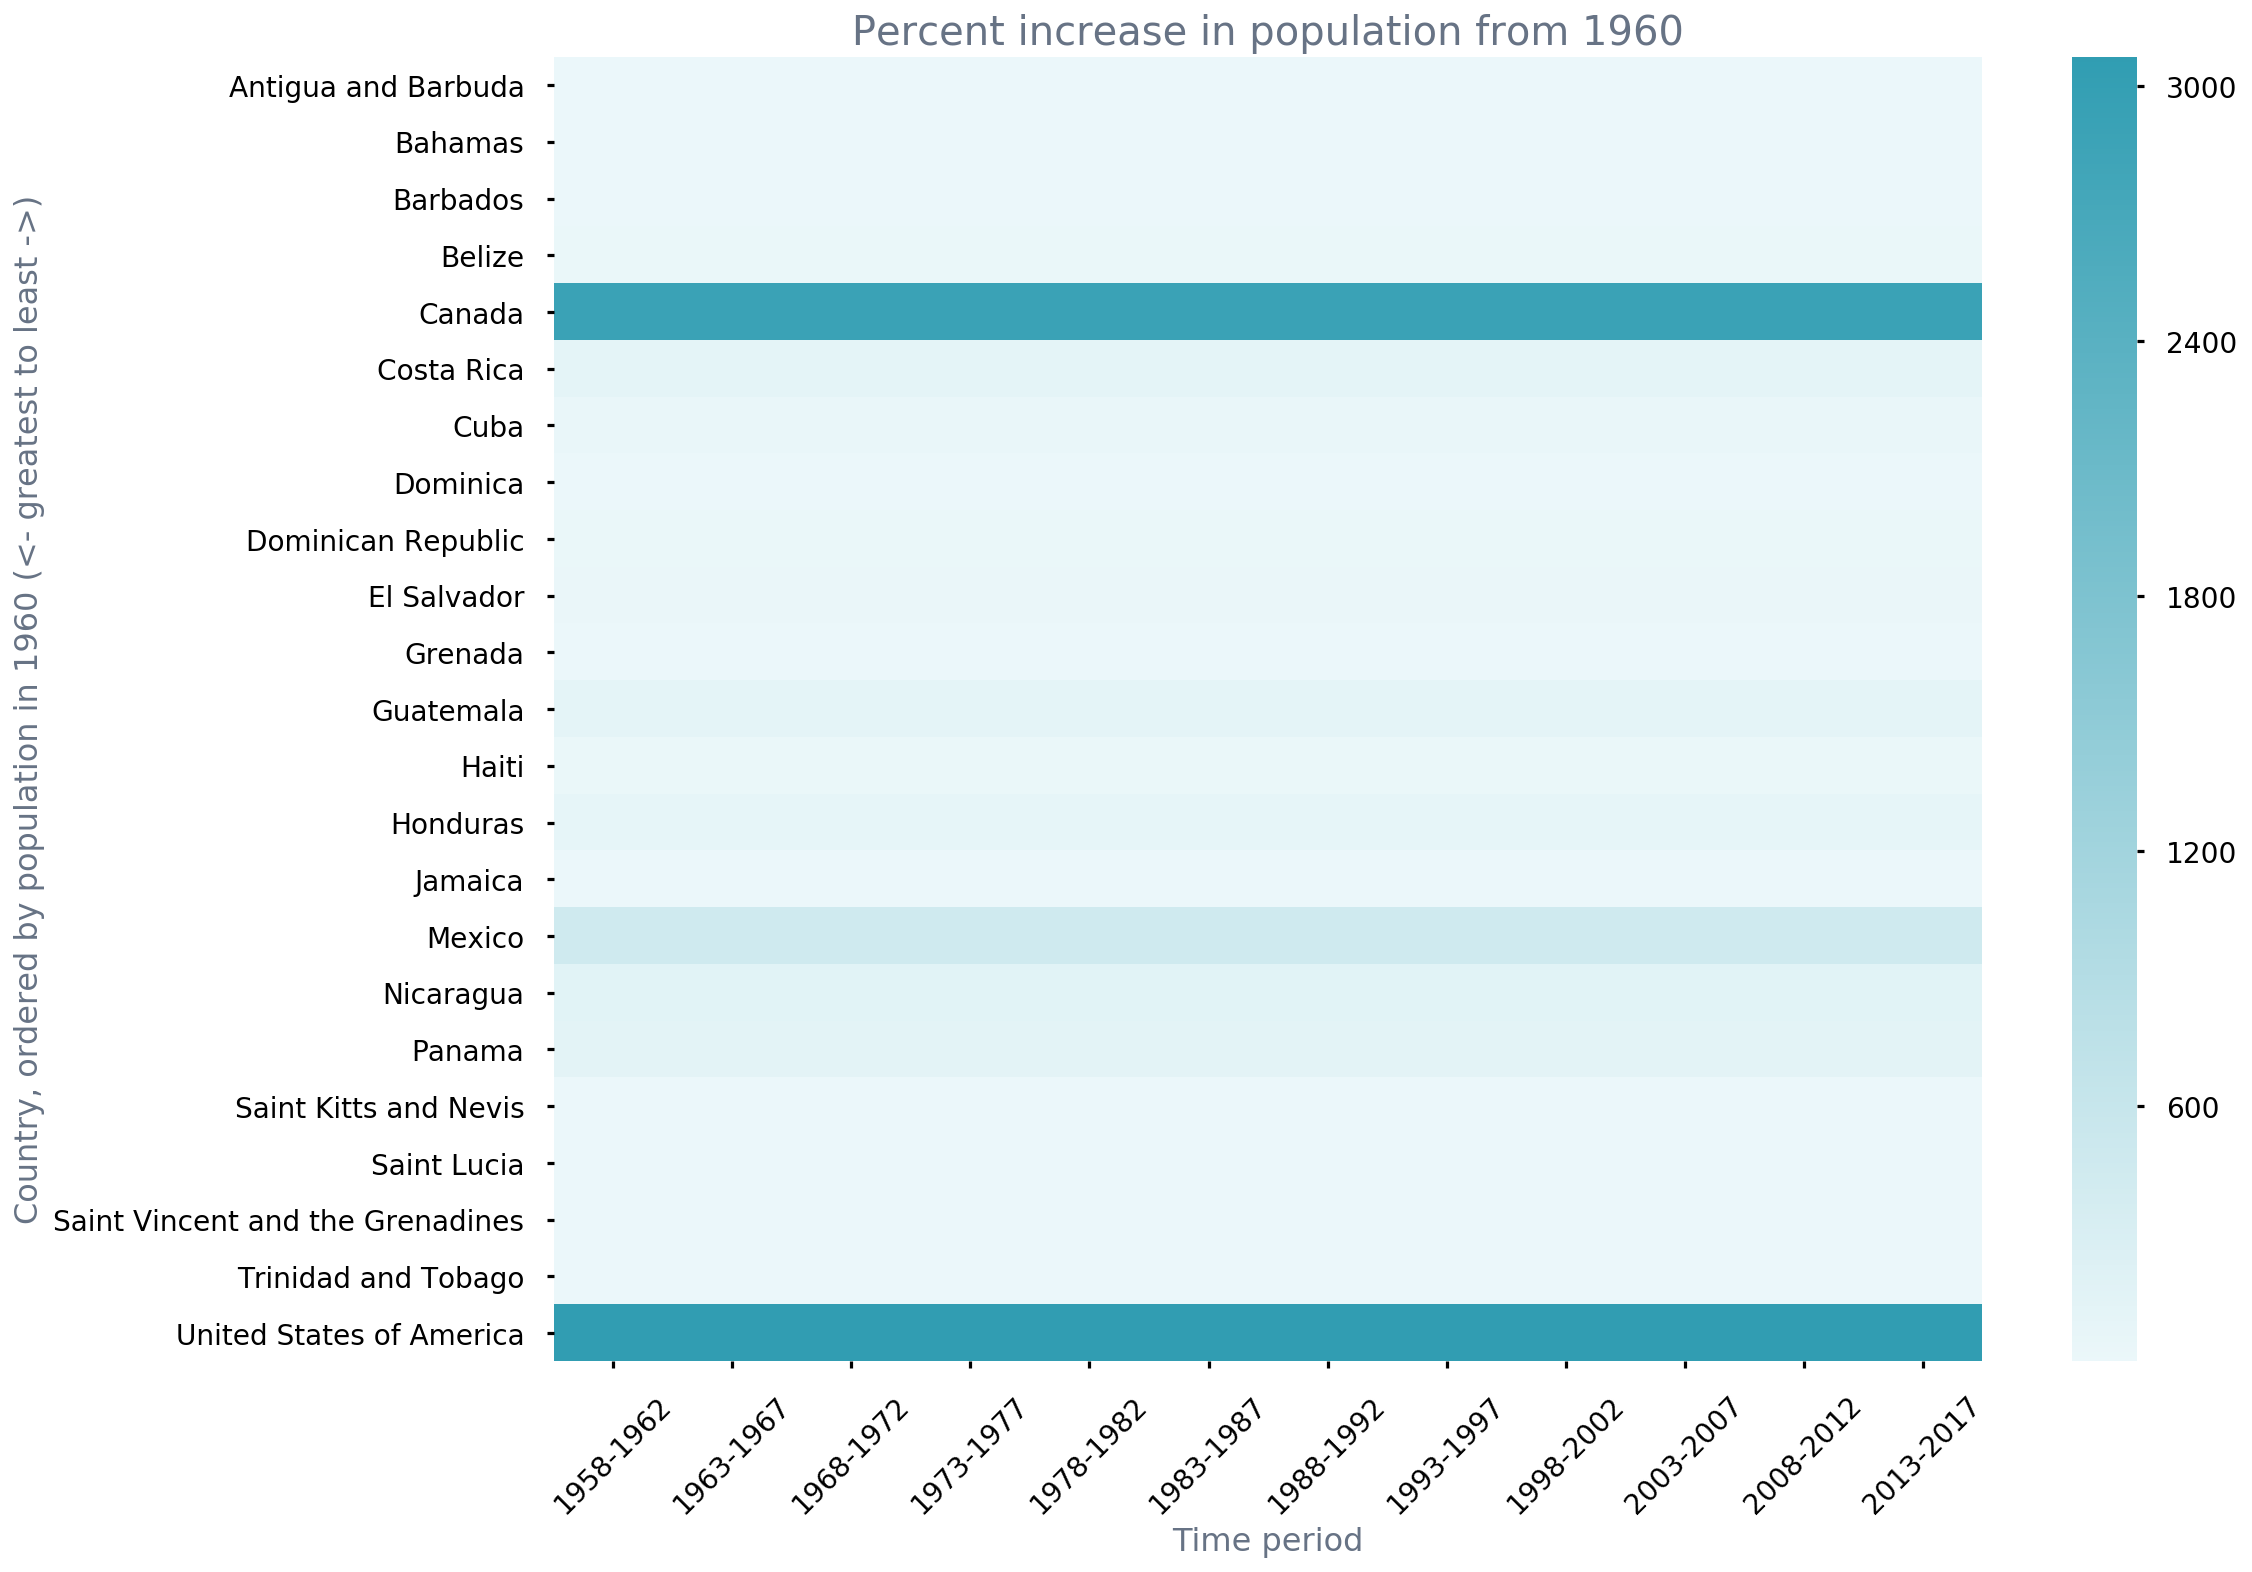

In [40]:
fig, ax = plt.subplots(figsize=(16, 12));
sns.heatmap(north_america_renew, ax=ax, cmap=sns.light_palette((214, 90, 60), input="husl", as_cmap=True));
plt.xticks(rotation=45);
plt.xlabel('Time period');
plt.ylabel('Country, ordered by population in 1960 (<- greatest to least ->)');
plt.title('Percent increase in population from 1960');


Total renewable resources doesn't seem to change over time... let's just check:

In [41]:
north_america_renew.head()

time_period,1958-1962,1963-1967,1968-1972,1973-1977,1978-1982,1983-1987,1988-1992,1993-1997,1998-2002,2003-2007,2008-2012,2013-2017
country,,,,,,,,,,,,
Antigua and Barbuda,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052
Bahamas,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700
Barbados,0.080,0.080,0.080,0.080,0.080,0.080,0.080,0.080,0.080,0.080,0.080,0.080
Belize,21.730,21.730,21.730,21.730,21.730,21.730,21.730,21.730,21.730,21.730,21.730,21.730
Canada,2902.000,2902.000,2902.000,2902.000,2902.000,2902.000,2902.000,2902.000,2902.000,2902.000,2902.000,2902.000


Just to be sure, let's subtract 1958-1962 values from each period and add up the results: 

In [42]:
north_america_renew.sub(north_america_renew.iloc[:,0], axis=0).sum()

time_period
1958-1962    0.0
1963-1967    0.0
1968-1972    0.0
1973-1977    0.0
1978-1982    0.0
1983-1987    0.0
1988-1992    0.0
1993-1997    0.0
1998-2002    0.0
2003-2007    0.0
2008-2012    0.0
2013-2017    0.0
dtype: float64

Does this apply to the rest of the world? 

In [43]:
renew = variable_slice(data, 'total_renewable')

In [44]:
renew.sub(renew.iloc[:,0], axis=0).sum()

time_period
1958-1962     0.0
1963-1967     0.0
1968-1972     0.0
1973-1977     0.0
1978-1982     0.0
1983-1987     0.0
1988-1992     0.0
1993-1997   -14.0
1998-2002   -14.0
2003-2007   -17.0
2008-2012   -17.0
2013-2017   -17.0
dtype: float64

Uh oh, looks like not. Let's look at it by country instead: 

In [45]:
renew.sub(renew.iloc[:,0], axis=0).sum(axis=1).sort_values().head()

country
Bhutan        -79.0
Afghanistan     0.0
Nigeria         0.0
Niue            0.0
Norway          0.0
dtype: float64

Bhutan changed! But no where else. Let's also check the other end of the sorted list:

In [46]:
renew.sub(renew.iloc[:,0], axis=0).sum(axis=1).sort_values().tail(50)

country
Djibouti                            0.0
Dominican Republic                  0.0
Hungary                             0.0
Iceland                             0.0
India                               0.0
Indonesia                           0.0
Iran (Islamic Republic of)          0.0
Iraq                                0.0
Ireland                             0.0
Israel                              0.0
Italy                               0.0
Jamaica                             0.0
Japan                               0.0
Jordan                              0.0
Kazakhstan                          0.0
Kenya                               0.0
Kiribati                            0.0
Kuwait                              0.0
Kyrgyzstan                          0.0
Lao People's Democratic Republic    0.0
Latvia                              0.0
Lebanon                             0.0
Lesotho                             0.0
Honduras                            0.0
Dominica                        

Oh, we've got NaNs... probably because these countries didn't always exist.

## Assessing many variables

In [47]:
def two_hist(df, variable, bins=50,
              ylabel='Number of countries', title=None):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))
    ax1 = plot_hist(df, variable, bins=bins, 
                    xlabel=variable, ylabel=ylabel, 
                    ax=ax1, title=variable if not title else title)
    ax2 = plot_hist(df, variable, bins=bins, 
                    xlabel='Log of '+ variable, ylabel=ylabel, 
                    logx=True, ax=ax2, 
                    title='Log of '+ variable if not title else title)
    plt.close()
    return fig

In [48]:
def hist_over_var(df, variables, bins=50,
                  ylabel='Number of countries', title=None):
    
    variable_slider = widgets.Dropdown(options=variables.tolist(),
                                      value=variables[0],
                                      description='Variable:',
                                      disabled=False,
                                      button_style='')
    widgets.interact(two_hist, df=widgets.fixed(df), 
                     variable=variable_slider, ylabel=widgets.fixed(ylabel),
                     title=widgets.fixed(title), bins=widgets.fixed(bins));

In [49]:
hist_over_var(recent, recent.columns, bins=20)

interactive(children=(Dropdown(description='Variable:', options=('accounted_flow', 'accounted_flow_border_rivers', 'agg_to_gdp', 'arable_land', 'avg_annual_rain_depth', 'avg_annual_rain_vol', 'cultivated_area', 'dam_capacity_per_capita', 'dependency_ratio', 'flood_occurence', 'gdp', 'gdp_per_capita', 'gender_inequal_index', 'groundwater_accounted_inflow', 'groundwater_accounted_outflow', 'groundwater_entering', 'groundwater_produced', 'groundwater_to_other_countries', 'human_dev_index', 'interannual_variability', 'irrigation_potential', 'irwr', 'irwr_per_capita', 'number_undernourished', 'overlap_surface_groundwater', 'percent_cultivated', 'percent_undernourished', 'permanent_crop_area', 'rural_pop', 'rural_pop_access_drinking', 'seasonal_variability', 'surface_entering', 'surface_groundwater_overlap', 'surface_inflow_secure_treaty', 'surface_inflow_submit_no_treaty', 'surface_inflow_submit_treaty', 'surface_outflow_secure_treaty', 'surface_outflow_submit_no_treaty', 'surface_outflow_submit_treaty', 'surface_to_other_countries', 'surface_total_external_renewable', 'surface_water_produced', 'total_area', 'total_dam_capacity', 'total_flow_border_rivers', 'total_pop', 'total_pop_access_drinking', 'total_renewable', 'total_renewable_groundwater', 'total_renewable_per_capita', 'total_renewable_surface', 'urban_pop', 'urban_pop_access_drinking', 'water_total_external_renewable', 'population_density'), value='accounted_flow'), Output()), _dom_classes=('widget-interact',))

<center><p style="text-align:center;font-size:160%">© <a href="http://www.svds.com">2017 Silicon Valley Data Science LLC</a></p></center>